In [1]:
import numpy as np                               
import pandas as pd         
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")                   

## Load and clean dataset

In [2]:
data = pd.read_csv('Reviews.csv')
print(data.shape)
data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
### add some columns for upvote metrics
data['Helpful %'] = np.where(data['HelpfulnessDenominator'] > 0, data['HelpfulnessNumerator'] / data['HelpfulnessDenominator'], -1)

In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0


### assigning different different labels to helpful% according to its value

In [6]:
data['Helpful %'].unique()

array([ 1.        , -1.        ,  0.8       ,  0.        ,  0.5       ,
        0.66666667,  0.25      ,  0.89473684,  0.83333333,  0.75      ,
        0.33333333,  0.3       ,  0.11111111,  0.42857143,  0.875     ,
        0.85714286,  0.2       ,  0.26315789,  0.6       ,  0.71428571,
        0.53846154,  0.57142857,  0.91489362,  0.86666667,  0.82352941,
        0.78571429,  0.74074074,  0.4       ,  0.375     ,  0.28571429,
        0.14285714,  0.77777778,  0.125     ,  0.9       ,  0.94117647,
        0.92307692,  0.7       ,  0.45454545,  0.88888889,  0.83870968,
        0.9047619 ,  0.92857143,  0.90909091,  0.91666667,  0.84615385,
        0.10526316,  0.98214286,  0.97826087,  0.7518797 ,  0.3125    ,
        0.1       ,  0.18518519,  0.88      ,  0.69230769,  0.625     ,
        0.54545455,  0.41666667,  0.45833333,  0.22222222,  0.81818182,
        0.8125    ,  0.16666667,  0.93103448,  0.88235294,  0.23529412,
        0.63636364,  0.81481481,  0.95652174,  0.64285714,  0.58

In [7]:
pd.cut(data['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: Helpful %, Length: 568454, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [8]:
data['%upvote'] = pd.cut( data['Helpful %'] , bins = [-1, 0, 0.2, 0.4, 0.6, 0.8, 1.0], labels = ['Empty', '0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])

In [9]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [10]:
data.groupby(['Score', '%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     Empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     Empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     Empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     Empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     Empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  Helpful %  
Score %upvote                                                              
1     Empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     Empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     Empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

### considering only Id Column, as I have to count Total Upvotes for different different categories

In [11]:
data.groupby(['Score', '%upvote']).agg({'Id':'count'})

Id
Score %upvote        
1     Empty      8060
      0-20%      2338
      20-40%     4649
      40-60%     6586
      60-80%     5838
      80-100%   12531
2     Empty      4234
      0-20%       762
      20-40%     1618
      40-60%     3051
      60-80%     2486
      80-100%    7014
3     Empty      5062
      0-20%       474
      20-40%     1506
      40-60%     3384
      60-80%     2754
      80-100%   11037
4     Empty      4780
      0-20%       116
      20-40%      909
      40-60%     3185
      60-80%     2941
      80-100%   26707
5     Empty     11638
      0-20%       432
      20-40%     2275
      40-60%    10312
      60-80%    11060
      80-100%  140661

In [12]:
data_s=data.groupby(['Score', '%upvote']).agg({'Id':'count'}).reset_index()
data_s

,Score,%upvote,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5838
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,762
8,2,20-40%,1618
9,2,40-60%,3051


### create Pivot Table for better conclusion

In [13]:
data_s.pivot(index='%upvote',columns='Score')

Id                            
Score        1     2      3      4       5
%upvote                                   
Empty     8060  4234   5062   4780   11638
0-20%     2338   762    474    116     432
20-40%    4649  1618   1506    909    2275
40-60%    6586  3051   3384   3185   10312
60-80%    5838  2486   2754   2941   11060
80-100%  12531  7014  11037  26707  140661

### create heatmap of it,for better Visualisations

Text(0.5, 1.0, 'How helpful users find among user scores')

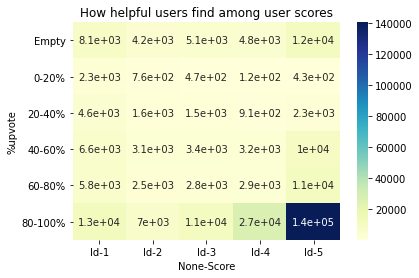

In [14]:
sns.heatmap(data_s.pivot(index='%upvote',columns='Score'),annot=True,cmap = 'YlGnBu')
plt.title('How helpful users find among user scores')

Key message from above:

1-Reviews are skewed towards positive

2-More than half of the reviews are with zero votes

3-Many people agree with score 5 reviews

In [15]:
data.shape

(568454, 12)

In [16]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpful %,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [17]:
data['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [18]:
data2 = data[data['Score'] != 3]
X = data2['Text']
y_dict = {1:0, 2:0, 4:1, 5:1}
y = data2['Score'].map(y_dict)

## convert your text into vectors using NLP

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cntVec = CountVectorizer(stop_words = 'english')
X_c = cntVec.fit_transform(X)
print('features: {}'.format(X_c.shape[1]))

features: 114969


## Make a LogisticRegression model and see the accuracy.

In [20]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y)
print(' train records: {}'.format(X_train.shape[0]))

 train records: 394360


In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)   
acc = model.score(X_test, y_test)
print(acc)

0.9353005614131179


#### fetch Top 20 Positive & Top 20 negative words

In [22]:
w = cntVec.get_feature_names()
w

['00',
 '000',
 '0000',
 '000001',
 '00001',
 '000013',
 '0000soo',
 '0001',
 '000111052',
 '0002251337',
 '0003',
 '0004',
 '000iu',
 '000kwh',
 '000mg',
 '000mi',
 '000s',
 '000su',
 '000usd',
 '000v',
 '001',
 '00100',
 '00127',
 '00128',
 '00129',
 '00130',
 '00131',
 '00132',
 '00134',
 '00136',
 '00139',
 '001bru',
 '002',
 '0020100604',
 '00202',
 '00227',
 '0023',
 '003',
 '004',
 '00493',
 '005',
 '00533',
 '0060187654',
 '0060721855',
 '0060928115',
 '0060959584',
 '0061658197',
 '006176793x',
 '0067575986',
 '0069615',
 '007',
 '00703',
 '00704',
 '0071468633',
 '0071477845',
 '0071486011',
 '0071499849',
 '008',
 '0099',
 '00a',
 '00am',
 '00b',
 '00gr',
 '00lb',
 '00m',
 '00pm',
 '00s',
 '00something',
 '00z',
 '01',
 '010',
 '0100',
 '01014',
 '01069',
 '011',
 '012',
 '013',
 '01317',
 '01318',
 '014',
 '0140444254',
 '0140446680',
 '0143114964',
 '014mg',
 '015',
 '017',
 '0174',
 '018',
 '0188',
 '019',
 '01915',
 '0199232768',
 '0199535892',
 '0199536066',
 '02',
 '02

In [23]:
coef = model.coef_.tolist()[0]
coef

[-0.36415248035740433,
 0.10141101208171954,
 0.3485702413455935,
 -0.0017576032877769196,
 0.0017578044396553527,
 -0.015952210842349848,
 0.0003521717322816502,
 -0.013973715050925541,
 0.0003840880949403164,
 0.00039175712499387133,
 0.0012667855312801343,
 -0.013327105273598568,
 0.000921960826260077,
 0.014282053306533126,
 -0.3982177204280691,
 0.008902194956599777,
 0.0032697801025348876,
 0.003878214043756019,
 0.0,
 4.991954215282793e-05,
 0.15795382334704455,
 0.0,
 0.033034143739339376,
 0.033034143739339376,
 0.033034143739339376,
 0.033034143739339376,
 0.033034143739339376,
 0.033034143739339376,
 0.033034143739339376,
 0.033034143739339376,
 0.033034143739339376,
 -0.00044553934367385674,
 0.050199995331965785,
 0.00012932735426871676,
 -0.1272304690172833,
 -0.0005192627771525606,
 0.0001293440588965821,
 0.002879480748902536,
 0.0371103272245828,
 2.221576911373637e-05,
 -0.11544244406529881,
 0.0,
 0.00011080399977798034,
 0.0050058069687544116,
 -0.11166917953577825,

In [24]:
coeff_data = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
coeff_data

,Word,Coefficient
0,00,-0.364152
1,000,0.101411
2,0000,0.348570
3,000001,-0.001758
4,00001,0.001758
...,...,...
114964,çaykur,0.000805
114965,çelem,-0.132017
114966,être,0.019083
114967,île,0.000000


In [25]:
coeff_data = coeff_data.sort_values(['Coefficient', 'Word'],ascending=False)
coeff_data

,Word,Coefficient
80600,pleasantly,3.944256
39072,downside,3.487803
5865,addicting,2.840347
94667,skeptical,2.762987
113138,worries,2.483502
...,...,...
88351,returnable,-3.094263
106852,unacceptable,-3.131906
113164,worst,-3.268772
107383,undrinkable,-3.670602


In [26]:
print('-Top 20 positive-')
print(coeff_data.head(20).to_string(index=False))
print('\n')
print('-Top 20 negative-')        
print(coeff_data.tail(20).to_string(index=False))

-Top 20 positive-
       Word  Coefficient
 pleasantly     3.944256
   downside     3.487803
  addicting     2.840347
  skeptical     2.762987
    worries     2.483502
   drawback     2.218218
   hesitant     2.211907
     delish     2.191324
       calm     2.186752
     hooked     2.161565
        met     2.091024
    easiest     2.078742
  excellent     2.072634
     intend     2.063682
   tastiest     2.049494
    perfect     2.023680
     resist     2.016443
      penny     1.997314
      meets     1.987674
   soothing     1.985055


-Top 20 negative-
           Word  Coefficient
           lame    -2.409135
 disappointment    -2.410652
       canceled    -2.446252
        vomited    -2.449675
        defeats    -2.526333
         lacked    -2.537648
     overpowers    -2.550526
          blech    -2.561176
          lousy    -2.673128
       mediocre    -2.764603
         ripoff    -2.795965
      cancelled    -2.808167
    embarrassed    -2.878521
    disapointed    -2.909961
  

#### lets try to create a function so that I can apply mutliple NLP Techniques + Multiple model algos in such a way that I will acheive my best accuracy

In [27]:
## A function to fit test.
def text_fit(X, y, nlp_model, model_model, coef_show=1):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    model =model_model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print ('Model Accuracy: {}'.format(acc))
    
    if coef_show == 1: 
        w = nlp_model.get_feature_names()
        coef = model.coef_.tolist()[0]
        coeff_data = pd.DataFrame({'Word' : w, 'Coefficient' : coef})
        coeff_data = coeff_data.sort_values(['Coefficient', 'Word'], ascending=[0, 1])
        print('\n')
        print('-Top 20 positive-')
        print(coeff_data.head(20).to_string(index=False))
        print('\n')
        print('-Top 20 negative-')        
        print(coeff_data.tail(20).to_string(index=False))

In [28]:
text_fit(X, y, cntVec, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9373088685015291


-Top 20 positive-
       Word  Coefficient
 pleasantly     4.295984
   downside     3.699585
  addicting     3.393978
  skeptical     2.849930
     hooked     2.599295
   drawback     2.574225
      saves     2.566581
     resist     2.551418
     delish     2.541549
    worries     2.421010
    welcome     2.416572
    easiest     2.346921
       whim     2.331929
     intend     2.319660
        met     2.277906
   terrific     2.242862
   hesitant     2.198312
    trainer     2.135609
  delighted     2.132402
   stumbled     2.032626


-Top 20 negative-
          Word  Coefficient
   embarrassed    -2.466737
      canceled    -2.477907
   unappealing    -2.477931
    overpowers    -2.495689
       defeats    -2.500712
         lousy    -2.568901
           ick    -2.577266
       vomited    -2.597496
         blech    -2.607401
        lacked    -2.632293
   disapointed    -2.859114
  

### Lets define a predict function

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
def predict(X, y, nlp_model, model_model):
    
    X_c = nlp_model.fit_transform(X)
    print('features: {}'.format(X_c.shape[1]))
    X_train, X_test, y_train, y_test = train_test_split(X_c, y)
    print(' train records: {}'.format(X_train.shape[0]))
    print(' test records: {}'.format(X_test.shape[0]))
    model=model_model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    cm=confusion_matrix(predictions,y_test)
    print(cm)
    acc=accuracy_score(predictions,y_test)
    print(acc)

In [30]:
predict(X, y, cntVec, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14849   2757]
 [  5581 108267]]
0.9365709677910143


#### Accuracy is around 93.9% - not bad. However we notice that some of those significant coefficients are not meaningful, e.g. 280mg.

In [31]:
### calling function for dummy classifier 
from sklearn.dummy import DummyClassifier
text_fit(X, y, cntVec, DummyClassifier(), 0)

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.8438008733092945


## Logistic regression model on TFIdata

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidata = TfidfVectorizer(stop_words = 'english')
text_fit(X, y, tfidata, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
Model Accuracy: 0.9356124575897272


-Top 20 positive-
       Word  Coefficient
      great    13.967593
  delicious    12.261312
       best    11.717822
    perfect    10.752456
  excellent     9.874541
      loves     9.475805
     highly     8.683331
  wonderful     8.393507
       love     8.283419
    amazing     7.838442
    awesome     7.630230
     hooked     7.388196
       good     7.292875
 pleasantly     7.121834
   favorite     7.056974
      yummy     7.021424
       nice     6.912509
    pleased     6.872144
     smooth     6.752825
       glad     6.470702


-Top 20 negative-
           Word  Coefficient
          gross    -5.649830
          waste    -5.668725
          stale    -5.739463
           yuck    -5.892323
     disgusting    -6.016771
          worse    -6.034391
    undrinkable    -6.265770
      tasteless    -6.337705
          bland    -6.561626
           weak    -6.614287
          threw    

In [33]:
predict(X, y, tfidata, LogisticRegression())

features: 114969
 train records: 394360
 test records: 131454
[[ 14173   2311]
 [  6315 108655]]
0.9343800873309295


### Accurany is roughly the same - 93.5%. However we notice that the significant words make much more sense now, with higher coefficient magnitude as well!

#### Upvote prediction

    We will be focusing on score 5 reviews, and get rid of comments with neutral votes

In [34]:
data = data[data['Score'] == 5]

In [35]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Helpful %', '%upvote'],
      dtype='object')

In [36]:
data2 = data[data['%upvote'].isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data2.shape

(154428, 12)

In [37]:
X = data2['Text']

In [38]:
y_dict = {'0-20%': 0, '20-40%': 0, '60-80%': 1, '80-100%': 1}
y = data2['%upvote'].map(y_dict)

In [39]:
print(y.value_counts())

1.0    151721
0.0      2707
Name: %upvote, dtype: int64


#### The target class 'y' is highly skewed , we will observe positive upvotes are too much higher than negative ones.
    Let's resample the data to get balanced data:

In [40]:
tf = TfidfVectorizer()
X_c = tf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_c,y,train_size=0.7)

In [41]:
y_test.value_counts()

1.0    45503
0.0      826
Name: %upvote, dtype: int64

## The data is imbalanced so we will use RandomOverSampler to handle it.

In [42]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_train_res, y_train_res = os.fit_resample(X_c, y)
X_train_res.shape,y_train_res.shape

((303442, 67507), (303442,))

In [43]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({1.0: 151721, 0.0: 2707})
Resampled dataset shape Counter({1.0: 151721, 0.0: 151721})


In [44]:
log_model= LogisticRegression()

In [45]:
grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}

In [46]:
from sklearn.model_selection import GridSearchCV

clf=GridSearchCV(estimator = log_model, param_grid = grid, cv = 5, n_jobs = -1, scoring = 'f1_macro')
clf.fit(X_train_res,y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [47]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  826     0]
 [  641 44862]]
0.9861641736277493


## At the end we reach to 98.6% accuracy.